In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [10]:
boston = pd.read_excel('../../data/boston.xls')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
boston.shape

(506, 14)

In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


시각화

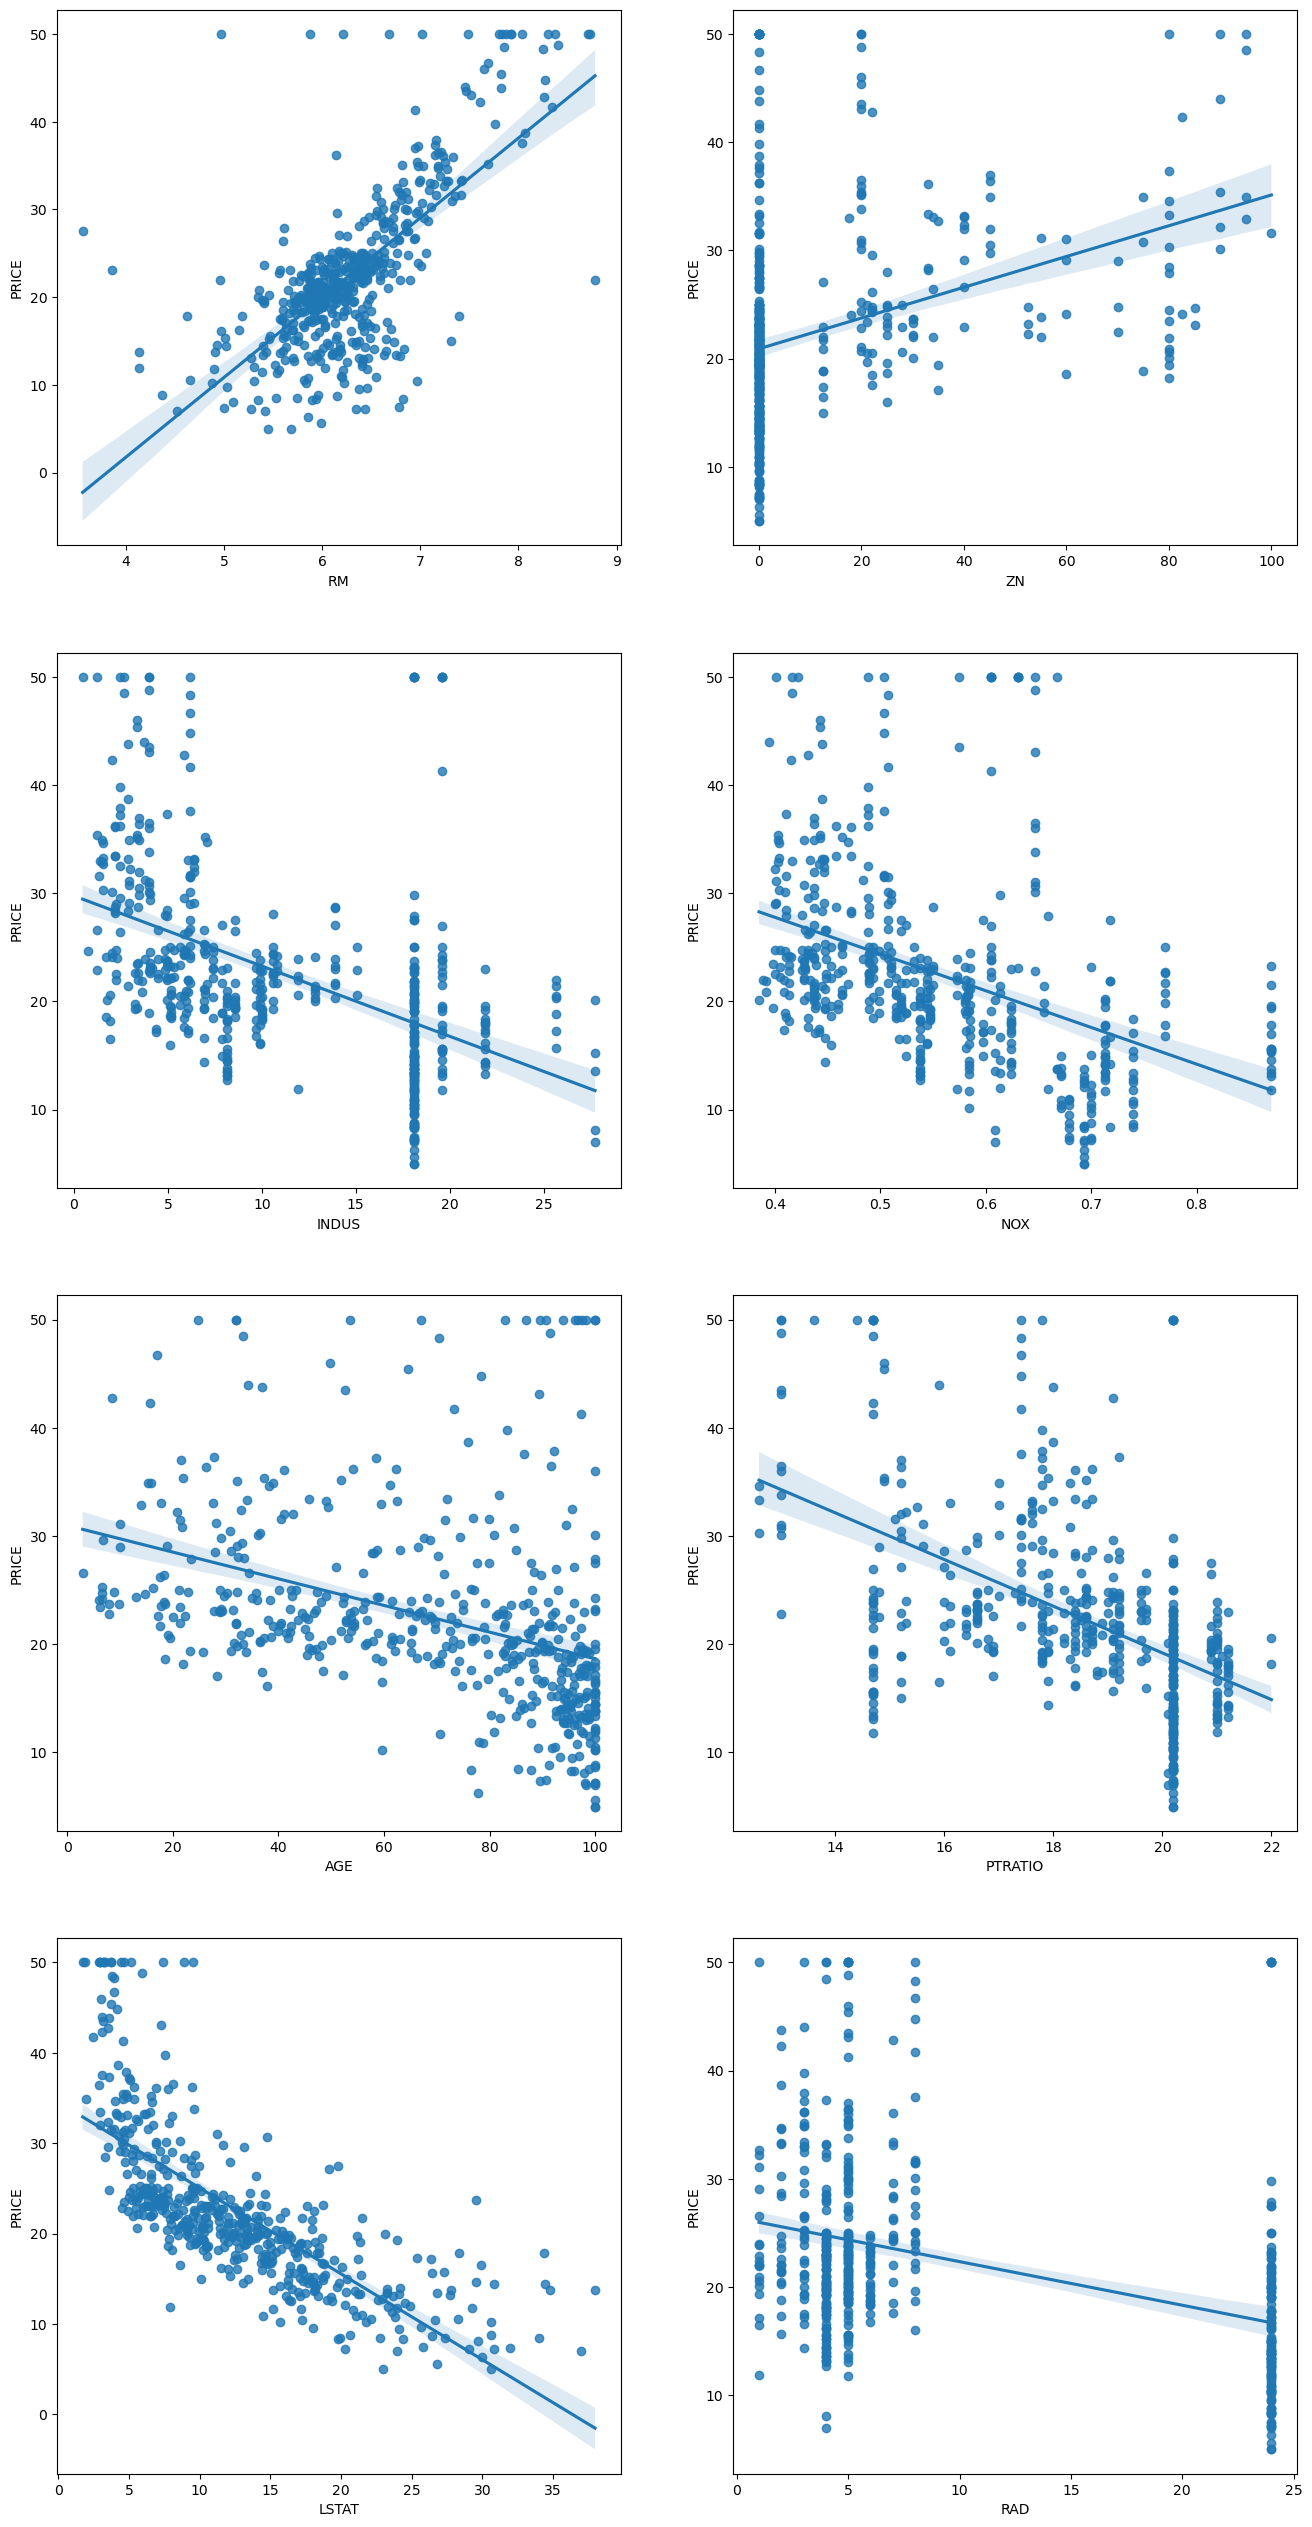

In [23]:
fig, axs = plt.subplots(figsize=(16,32),ncols=2,nrows=4)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2
    # 산점도와 선형회귀식 동시에 표현
    sns.regplot(x=feature,y='PRICE',data=boston,ax=axs[row][col])

모델 학습 및 예측

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y_target = boston['PRICE']
X_data = boston.drop(['PRICE'],axis=1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,
                                                 random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
rmse = np.sqrt(mse)

print("MSE: {:.3f}, RMSE: {:.3f}\nR-squared Score: {:.3f}".format(mse,rmse,r2))

MSE: 17.297, RMSE: 4.159
R-squared Score: 0.757


In [28]:
print('절편 값:',lr.intercept_)
print('회귀계수 값:',lr.coef_)

절편 값: 40.99559517216436
회귀계수 값: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


피처별 회귀계수값 확인하기

In [30]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

해석 : NOX 피처의 회귀계수가 지나치게 작음 >> 최적화를 통해 수정해나가면 됨

In [31]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',
                                cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5-folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5-folds의 평균 RMSE :',np.round(avg_rmse,2))

5-folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5-folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5-folds의 평균 RMSE : 5.83
